# Setup

In [1]:
from collections import Counter, defaultdict
from urllib.parse import urlparse

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 22})

import project3utils
import project3models
import project3data
from importlib import reload

In [2]:
# reload(project3data)
data = project3data.get_training_data()

In [3]:
corr = data.corr()
# corr['sort_column'] = corr['is_phishing'].apply(abs)
corr['is_phishing'].sort_values(ascending=False)

is_phishing               1.000000
subdomain_empty_string    0.459944
path_entropy              0.456526
path_ends_in_php          0.430043
path_char_slash           0.418328
path_char_p               0.382555
path_char_dot             0.352761
path_consonants           0.298143
path_total_chars          0.292671
path_char_c               0.288831
domain_total_chars        0.282942
path_char_o               0.265365
domain_consonants         0.261201
path_char_n               0.255265
path_vowels               0.254571
path_char_h               0.253617
path_char_m               0.240843
path_char_l               0.238332
domain_char_0             0.233906
path_char_d               0.232072
path_char_x               0.220945
path_char_e               0.215547
domain_digits             0.209961
path_char_f               0.206474
path_char_g               0.201730
domain_entropy            0.199805
path_digits               0.195343
path_char_b               0.178700
path_char_7         

In [4]:
averages = data.groupby(['is_phishing']).mean()
important_feature_columns = [
    'path_empty_string','path_entropy','path_char_slash','path_ends_in_php',
    'https','subdomain_total_chars','subdomain_empty_string','subdomain_entropy',
    'domain_total_chars'
]
averages[important_feature_columns]

,path_empty_string,path_entropy,path_char_slash,path_ends_in_php,https,subdomain_total_chars,subdomain_empty_string,subdomain_entropy,domain_total_chars
is_phishing,,,,,,,,,
0,0.40934,1.325141,0.619835,0.012247,0.477248,5.058548,0.119785,0.844584,12.774071
1,0.07160,2.370844,2.075000,0.339400,0.173000,3.568800,0.554500,0.495165,15.571100


In [11]:
phishing_data = data[data.is_phishing == 1]
phishing_percentiles = phishing_data.quantile([i / 100 for i in range(1, 100)])
phishing_percentiles.to_csv('static/phishing_percentiles.csv', index_label='percentile')

nonphishing_data = data[data.is_phishing == 0]
nonphishing_percentiles = nonphishing_data.quantile([i / 100 for i in range(1, 100)])
nonphishing_percentiles.to_csv('static/nonphishing_percentiles.csv', index_label='percentile')

# Modeling

============= domain_model =============
Accuracy: 0.9
             precision    recall  f1-score   support

          0       0.89      0.92      0.90      2978
          1       0.92      0.89      0.90      3035

avg / total       0.90      0.90      0.90      6013



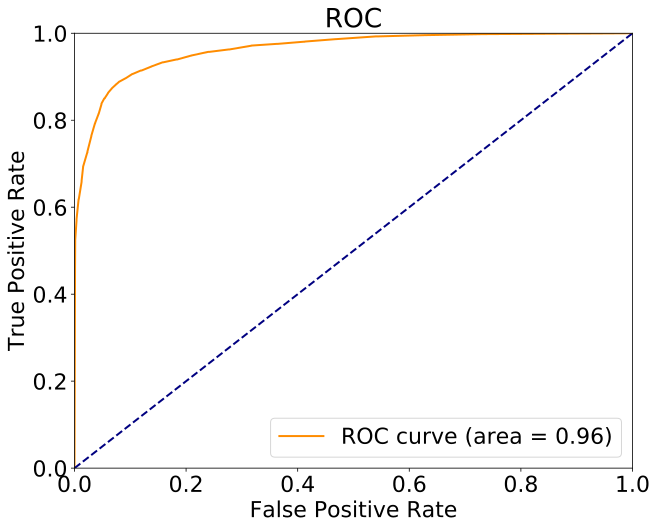

============= path_model =============
Accuracy: 0.89
             precision    recall  f1-score   support

          0       0.86      0.86      0.86      1698
          1       0.91      0.92      0.92      2811

avg / total       0.89      0.89      0.89      4509



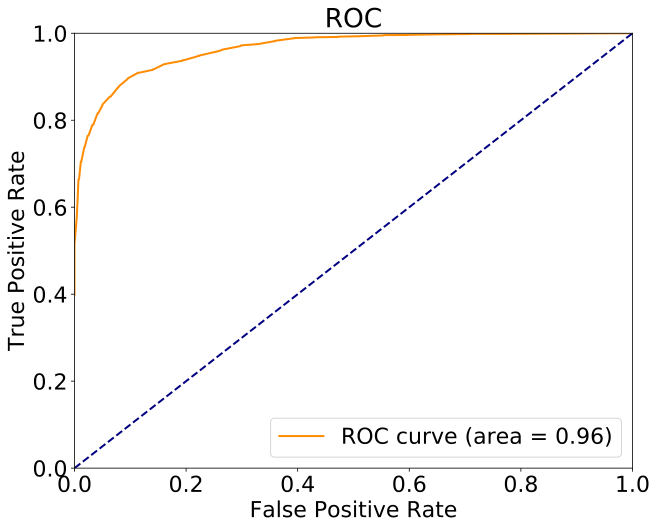

============= model =============
Accuracy: 0.93
             precision    recall  f1-score   support

          0       0.91      0.95      0.93      2978
          1       0.95      0.90      0.92      3035

avg / total       0.93      0.93      0.93      6013



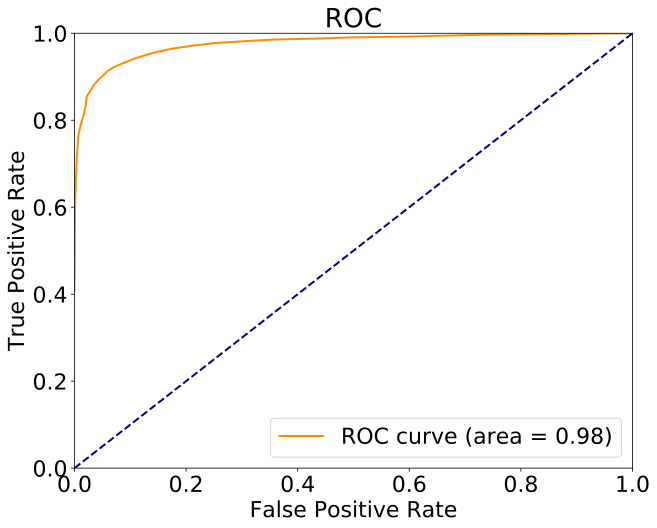

In [7]:
reload(project3models)
project3models.train_models(data)

In [12]:
models = project3models.get_models()
models

{'domain_model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 'path_model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=Non

In [13]:
model = models['model']

In [14]:
def top_n_features(model, columns, n):
    return sorted(list(zip(columns, model.feature_importances_)), reverse=True, key=lambda f: f[1])[0:n]

In [15]:
top_n_features(models['model'], project3utils.numeric_feature_columns, 30)

[('subdomain_empty_string', 0.046956957999174466),
 ('subdomain_total_chars', 0.045898762264477137),
 ('path_ends_in_php', 0.044153031233148822),
 ('subdomain_consonants', 0.041792634772054658),
 ('path_entropy', 0.037057628438803045),
 ('path_total_chars', 0.036516745764626636),
 ('domain_entropy', 0.03049496697852137),
 ('path_vowels', 0.029169036840877339),
 ('https', 0.028729780923883882),
 ('path_char_hyphen', 0.02834294535681409),
 ('domain_total_chars', 0.025665891943378885),
 ('path_char_dot', 0.023033827813837754),
 ('path_char_p', 0.022315919713690818),
 ('domain_consonants', 0.02003786114476349),
 ('path_char_slash', 0.019138429060340984),
 ('path_char_h', 0.017706418994606975),
 ('domain_char_p', 0.017685252664738131),
 ('path_digits', 0.016290426398062326),
 ('path_consonants', 0.015673991139656993),
 ('domain_char_0', 0.014851865503119234),
 ('path_char_d', 0.014300008669988646),
 ('path_char_n', 0.013527117048009926),
 ('subdomain_entropy', 0.013153872402029042),
 ('doma

In [16]:
top_n_features(models['domain_model'], project3utils.nonpath_feature_columns, 30)

[('subdomain_total_chars', 0.074383030352264304),
 ('subdomain_consonants', 0.071569820562060571),
 ('domain_total_chars', 0.061254180958270059),
 ('domain_entropy', 0.054847995422745682),
 ('subdomain_empty_string', 0.050580703358393188),
 ('domain_consonants', 0.042782365855880987),
 ('https', 0.040022733603431636),
 ('domain_vowels', 0.028046641386349144),
 ('domain_char_o', 0.025484469959985382),
 ('domain_digits', 0.023087651412117032),
 ('domain_char_e', 0.022521252368392999),
 ('domain_char_p', 0.021878013671689268),
 ('domain_char_a', 0.02174135798343237),
 ('domain_char_i', 0.02043551531007903),
 ('domain_char_n', 0.019526093068592907),
 ('domain_char_c', 0.019338321544261426),
 ('domain_char_r', 0.01861898808253774),
 ('subdomain_entropy', 0.01825561948176848),
 ('domain_char_g', 0.017794656364335106),
 ('domain_char_0', 0.017782245868666502),
 ('domain_char_s', 0.017059164699671076),
 ('domain_char_l', 0.016743543525100272),
 ('domain_char_t', 0.016341930756019425),
 ('domai

In [17]:
top_n_features(models['path_model'], project3utils.path_feature_columns, 30)

[('path_char_hyphen', 0.083315223464027005),
 ('path_char_slash', 0.076465519947803998),
 ('path_entropy', 0.059966175308671002),
 ('path_ends_in_php', 0.053646464487341533),
 ('path_total_chars', 0.04598581319992924),
 ('path_consonants', 0.045282657016467359),
 ('path_char_dot', 0.03861098055477126),
 ('path_char_p', 0.035537821778633044),
 ('path_char_k', 0.035235657221692494),
 ('path_char_i', 0.032360581568422815),
 ('path_digits', 0.031397679755430667),
 ('path_vowels', 0.030490895731698265),
 ('path_char_s', 0.030431584654755157),
 ('path_char_o', 0.022478858574833723),
 ('path_char_r', 0.022418194987984977),
 ('path_char_h', 0.021984303054940941),
 ('path_char_a', 0.020836265566300249),
 ('path_char_e', 0.020323228045137386),
 ('path_char_m', 0.020320967756257483),
 ('path_char_t', 0.019817551560712673),
 ('path_char_w', 0.019281051823963766),
 ('path_char_d', 0.019224154092367735),
 ('path_char_n', 0.019030532240721987),
 ('path_char_c', 0.018443704972441102),
 ('path_char_f',